# São Paulo Real Estate - Sale/Rent - April 2019

**D2APR: Aprendizado de Máquina e Reconhecimento de Padrões** (IFSP, Campinas)
Especialização em Ciência de Dados - IFSP Campinas

Alunos
- Daniel Vargas Shimamoto
- Diego Machado de Assis

## 1. Informações Gerais

### 1.1. Contexto do problema

### 1.2. Conhecendo  o dataset

O Dataset contem cerca de 13000 dados referentes a venda e aluguel de apartamentos na cidade de São Paulo (Brasil). Os dados foram coletados de diversas fontes, principalmente de sites de classificados de imóveis. Todos os dados foram coletados no mês de abril de 2019.


### 1.3. Principais atributos e seus tipos

Os dados dos imóveis possuem 16 atributos

* Price (int): Preço total anunciado em reais
* Condo (int): Condomínio em reais (Valores desconhecidos são marcados como zero)
* Size (int): Tamanho da propriedade em m² (Somente áreas privadas)
* Rooms (int): Número de Quartos
* Toilets (int): Númerto total de banheiros 
* Suites (int): Número de suites (Quartos com banheiros privativos)
* Parking (int): Número de vagas de estacionamento
* Elevator (binario): Se existe elevador (1 - sim, 0 - não)
* Furnished (binario): Se o imóvel é mobiliado (1 - sim, 0 - não)
* Swimming Pool (binario): Se existe piscina na propriedade (1 - sim, 0 - não)
* New (binario): Se o apartamento é novo (1 - sim, 0 - não) 
* District (string) : Bairro e cidade que o imóvel está localizado
* Negotiation Type (string): Alugel ou venda
* Property Type (string): Tipo de propriedade
* Latitude (float): Latitude do imóvel
* Longitude (float): Longitude do imóvel 

### 1.4 Objetivo

O Objetivo desse estudo é prever o valor dos apartamentos (*Price*) com base nas suas características, possibilitando a automatização desse processo. A criação de um modelo pode reduzir os custos de cotação realizado por empresas para inferir um valor aos imóveis.

## 2. Limpeza da base e Análise exploratória

### 2.1 Limpeza dos dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data/sao-paulo-properties-april-2019.csv')

print(f'O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas')

df.head()

O dataset possui 13640 linhas e 16 colunas


,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

In [4]:
# Dados nulos
print(f'O dataset possui {df.isnull().sum().sum()} dados Nulos')

O dataset possui 0 dados Nulos


In [5]:
# Dados duplicados
print(f'O dataset possui {df.duplicated().sum()} dados duplicados')

O dataset possui 319 dados duplicados


In [6]:
df[df.duplicated(keep=False)].sort_values(by='Price')

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
255,800,100,35,2,2,1,1,0,0,0,0,Itaquera/São Paulo,rent,apartment,-23.529224,-46.451101
9687,800,100,35,2,2,1,1,0,0,0,0,Itaquera/São Paulo,rent,apartment,-23.529224,-46.451101
3172,800,0,34,1,1,0,0,0,0,0,0,São Lucas/São Paulo,rent,apartment,-23.589273,-46.552004
3174,800,0,34,1,1,0,0,0,0,0,0,São Lucas/São Paulo,rent,apartment,-23.589273,-46.552004
286,800,220,60,2,2,1,1,0,0,0,0,Jardim Helena/São Paulo,rent,apartment,-23.463087,-46.415487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7833,1072140,0,134,4,3,2,2,1,0,1,0,Lapa/São Paulo,sale,apartment,-23.517324,-46.712504
9048,1982000,1800,160,4,4,3,2,1,0,0,1,Pinheiros/São Paulo,sale,apartment,-23.550855,-46.680005
9049,1982000,1800,160,4,4,3,2,1,0,0,1,Pinheiros/São Paulo,sale,apartment,-23.550855,-46.680005
9069,1982000,1800,160,4,4,3,2,1,0,0,1,Pinheiros/São Paulo,sale,apartment,-23.550855,-46.680005


In [7]:
df.drop_duplicates(inplace=True)
print(f'Após a exlusão dos duplicados o dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas')

Após a exlusão dos duplicados o dataset possui 13321 linhas e 16 colunas


In [8]:
# Convertendo espaço por "_" no nome das colunas
df.columns = df.columns.str.replace(' ','_')
df.head(3)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming_Pool,New,District,Negotiation_Type,Property_Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665


### 2.2. Separação da base de teste

Após a limpeza dos dados duplicados e dos valores vazios, vamos começar a análise exploratória. Antes de começar a análisar os dados, vamos criar uma cópia do dataset limpo e dividir a base em dados de treino em teste. Para montar um modelo que seja consistente os dados de testes não devem ser usados para análisar e preparar a base, demo que a divisão deve ser feita anteriormente.
O parâmetro **Negotiation_Type** define se o imóvel é para *venda* ou *aluguel* e ele afeta muito a variável alvo *Price*. Dessa forma vamos estratificar a amostra nesse parâmetro, garantindo a homogeneidade em relação a esse atributo.


In [9]:
new_df = df.copy()

new_df.head(3)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming_Pool,New,District,Negotiation_Type,Property_Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665


In [10]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(new_df, test_size=0.2, stratify=df['Negotiation_Type'], random_state=13)

print(f'Temos {df_train.shape} dados de treino e {df_test.shape} dados de teste')

Temos (10656, 16) dados de treino e (2665, 16) dados de teste


In [11]:
df_train['Negotiation_Type'].value_counts()/len(df_train['Negotiation_Type'])

rent    0.526933
sale    0.473067
Name: Negotiation_Type, dtype: float64

In [12]:
df_test['Negotiation_Type'].value_counts()/len(df_test['Negotiation_Type'])

rent    0.526829
sale    0.473171
Name: Negotiation_Type, dtype: float64

### 2.3. Análise exploratória

#### 2.3.1. Variáveis Númericas

In [13]:
num_atri = ['Price','Condo','Size','Latitude','Longitude','Rooms','Toilets','Suites','Parking']
df_train[num_atri]

,Price,Condo,Size,Latitude,Longitude,Rooms,Toilets,Suites,Parking
7220,225000,270,50,-23.608192,-46.523508,2,2,1,1
9132,1500,370,50,-23.549123,-46.619121,2,2,1,1
5206,1800,540,50,-23.562313,-46.601342,2,2,1,1
135,1000,0,70,-23.551332,-46.477462,2,2,1,1
4833,2500,850,73,-23.531443,-46.726738,2,2,1,1
...,...,...,...,...,...,...,...,...,...
4716,3800,880,60,-23.560533,-46.674545,2,1,0,1
4774,950,547,64,-23.488581,-46.719538,2,1,0,0
3379,11500,1900,222,-23.624992,-46.675662,2,3,2,4
960,1500,350,48,-23.687211,-46.668608,2,2,1,1


In [14]:
df_train[num_atri].describe().round(2)

,Price,Condo,Size,Latitude,Longitude,Rooms,Toilets,Suites,Parking
count,10656.00,10656.00,10656.00,10656.00,10656.00,10656.00,10656.00,10656.00,10656.00
mean,290057.67,697.76,84.74,-22.04,-43.51,2.32,2.08,0.99,1.40
std,592689.31,767.87,58.86,5.95,11.64,0.78,0.96,0.84,0.84
min,480.00,0.00,30.00,-46.75,-58.36,1.00,1.00,0.00,0.00
25%,1900.00,293.00,50.00,-23.59,-46.68,2.00,2.00,1.00,1.00
50%,9000.00,512.00,65.00,-23.55,-46.64,2.00,2.00,1.00,1.00
75%,366775.00,850.00,94.00,-23.52,-46.56,3.00,2.00,1.00,2.00
max,10000000.00,9500.00,852.00,0.00,0.00,10.00,8.00,6.00,9.00


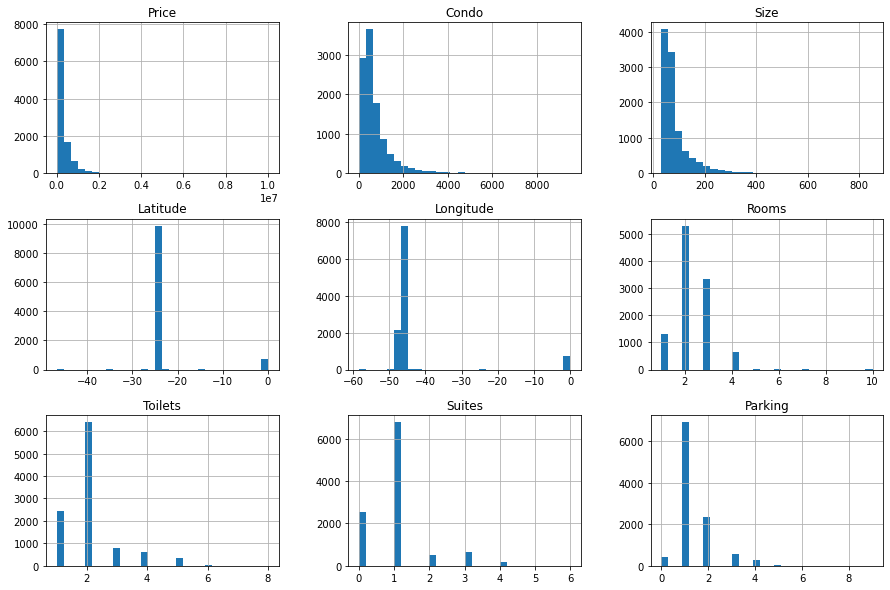

In [15]:
df_train[num_atri].hist(bins=30, figsize=(15,10))
display()

Text(0.5, 1.0, 'Size - Boxplot')

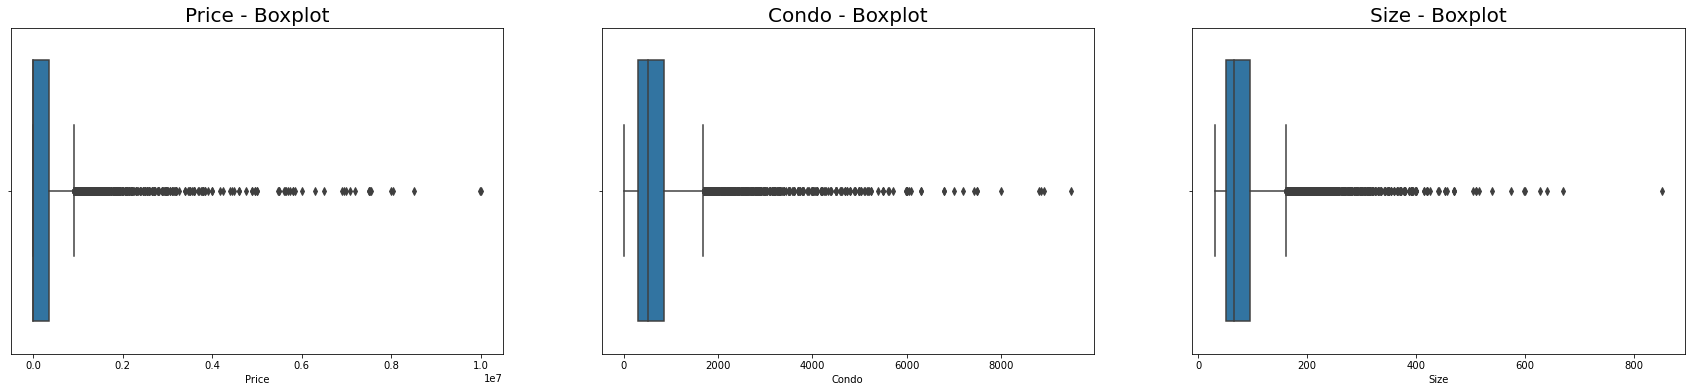

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(30, 6))

sns.boxplot(data = df_train, x='Price', ax = ax[0])
ax[0].set_title('Price - Boxplot', fontsize = 20)

sns.boxplot(data = df_train, x='Condo', ax = ax[1])
ax[1].set_title('Condo - Boxplot', fontsize = 20)

sns.boxplot(data = df_train, x='Size', ax = ax[2])
ax[2].set_title('Size - Boxplot', fontsize = 20)

As variáveis **Price**, **Condo** e **Size** possuem formato de uma curva assimétrica à esquerda. A análise dos boxplot dessas variáveis apontam vários outliers, porém nenhum deles é muito distante dos valores. Optamos por não excluir nenhum dos valores

A **Latitude** e **Longitude** possui uma distribuição muito concentrada e alguns valores zerados que podem ser interpretados como falta de informação das variáveis. 

**Rooms**, **Toilets**, **Suites** e **Parking** são variáveis que possuem uma moda bem evidente e támbem se assemelham a uma curva assimétrica à esquerda, porém com uma quantidade distinta de valores reduzidas. Os seus valores mínimos e máximos estão dentro do esperado e possíveis.

#### 2.3.2. Variáveis Categóricas

In [17]:
cat_atri = ['Elevator', 'Furnished', 'Swimming_Pool', 'New', 'District', 'Negotiation_Type', 'Property_Type']
df_train[cat_atri].head(3)

,Elevator,Furnished,Swimming_Pool,New,District,Negotiation_Type,Property_Type
7220,0,1,1,0,Jardim Ângela/São Paulo,sale,apartment
9132,1,0,0,0,Brás/São Paulo,rent,apartment
5206,0,0,1,0,Mooca/São Paulo,rent,apartment


In [18]:
for i in cat_atri:
    print(i)
    print(f'{df_train[i].value_counts()}\n')

Elevator
0    6849
1    3807
Name: Elevator, dtype: int64

Furnished
0    9082
1    1574
Name: Furnished, dtype: int64

Swimming_Pool
1    5515
0    5141
Name: Swimming_Pool, dtype: int64

New
0    10498
1      158
Name: New, dtype: int64

District
Moema/São Paulo              238
Mooca/São Paulo              229
Brooklin/São Paulo           202
Pinheiros/São Paulo          196
Casa Verde/São Paulo         194
                            ... 
Jardim São Luis/São Paulo     34
Lajeado/São Paulo             33
Grajaú/São Paulo              27
São Domingos/São Paulo        25
Perus/São Paulo               13
Name: District, Length: 96, dtype: int64

Negotiation_Type
rent    5615
sale    5041
Name: Negotiation_Type, dtype: int64

Property_Type
apartment    10656
Name: Property_Type, dtype: int64



In [19]:
print(f'Existem {len(df_train["District"].unique())} valores distintos de "District" no dataset')

Existem 96 valores distintos de "District" no dataset


<AxesSubplot:xlabel='Price', ylabel='Negotiation_Type'>

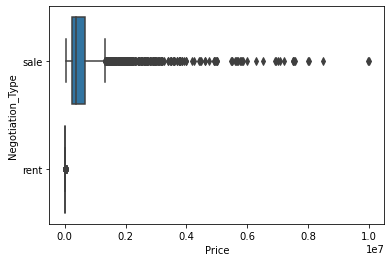

In [20]:
sns.boxplot(data = df_train, x='Price',y ='Negotiation_Type')

**Elevator**,**Furnished**,**Swimming Pool**,**New** são variáveis binárias, ou seja, os valores são 0 (negativo) ou 1 (positivo). 

A variável **Negotiation Type** também possui dois valores e será transformada em binária posteriormente. Um fato interessante sobre essa variável é que dependendo do tipo a variável alvo possui valores bem diferentes. O Range de preço para aluguel é bem inferior ao de venda.

Dentro de **District** existem 96 bairros diferentes, sendo Moema com maior número de ocorrências (238) e Perus o de menor valor (13)

A Coluna **Property Type** possui um valor único, visto que todos os imóveis da base são apartamentos

### 2.4. Negotiation Type = Rent

A partir de agora vamos dividir a análise exploratória em duas partes, a primeira será referente a apartamentos para alugar e a segunda para compra. Visto que a variável alvo é muito dependente do tipo de negociação do imóvel, vamos fazer análises separadas para encontrar as principais variáveis correlacionadas e como está a distribuição das demais

In [21]:
df_rent = df_train.query('Negotiation_Type == "rent"')
df_rent.head(3)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming_Pool,New,District,Negotiation_Type,Property_Type,Latitude,Longitude
9132,1500,370,50,2,2,1,1,1,0,0,0,Brás/São Paulo,rent,apartment,-23.549123,-46.619121
5206,1800,540,50,2,2,1,1,0,0,1,0,Mooca/São Paulo,rent,apartment,-23.562313,-46.601342
135,1000,0,70,2,2,1,1,0,0,0,0,Cidade Líder/São Paulo,rent,apartment,-23.551332,-46.477462


In [22]:
df_rent[num_atri].describe().round(2)

,Price,Condo,Size,Latitude,Longitude,Rooms,Toilets,Suites,Parking
count,5615.00,5615.00,5615.00,5615.00,5615.00,5615.00,5615.00,5615.00,5615.00
mean,3131.41,838.17,90.54,-22.02,-43.46,2.32,2.12,1.04,1.47
std,3636.16,850.38,65.27,6.01,11.75,0.83,1.00,0.89,0.91
min,480.00,0.00,30.00,-46.75,-58.36,1.00,1.00,0.00,0.00
25%,1370.00,400.00,52.00,-23.60,-46.69,2.00,2.00,1.00,1.00
50%,2000.00,600.00,68.00,-23.56,-46.65,2.00,2.00,1.00,1.00
75%,3450.00,1000.00,101.00,-23.52,-46.59,3.00,2.00,1.00,2.00
max,50000.00,9500.00,852.00,0.00,0.00,10.00,8.00,5.00,9.00


<AxesSubplot:>

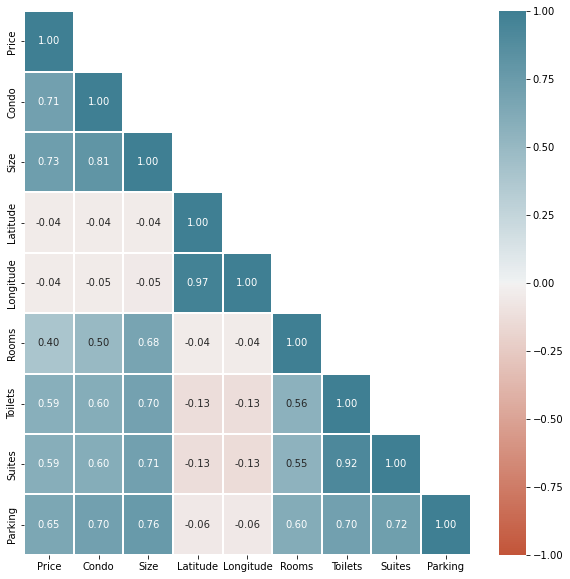

In [23]:
plt.figure(figsize=(10, 10))

mask = np.zeros_like(df_rent[num_atri].corr())
mask[np.triu_indices_from(mask, k=1)] = True

sns.heatmap(df_rent[num_atri].corr(), mask=mask, linewidths=.3, cmap=sns.diverging_palette(20, 220, as_cmap=True), vmin=-1, vmax=1, annot = True, fmt = '.2f')

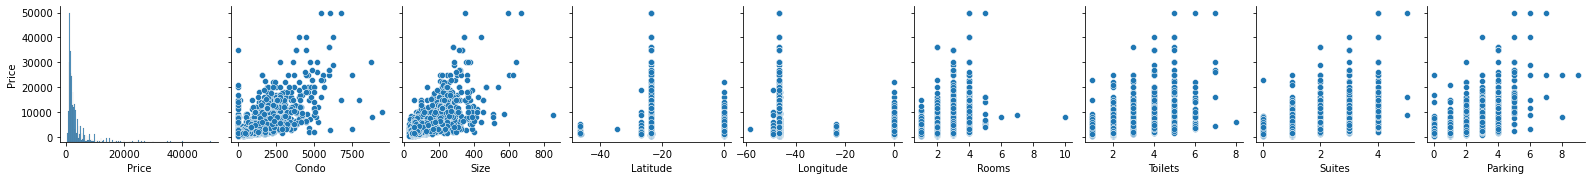

In [24]:
sns.pairplot(df_rent, y_vars=["Price"], x_vars = num_atri)

Os apartamentos para alugar possuem uma alta correlação com as características internas do imóvel (Tamanho, quartos, banheiros, suites, estacionamentos). O valor do condomínio também possui uma correlação positiva com o preço do imóvel.

In [25]:
df_rent.groupby('Elevator')['Price'].describe().T.round(2)

Elevator,0,1
count,3900.00,1715.00
mean,3061.07,3291.36
std,3646.06,3609.51
min,480.00,600.00
25%,1300.00,1500.00
50%,1900.00,2100.00
75%,3200.00,3600.00
max,50000.00,50000.00


In [26]:
df_rent.groupby('Furnished')['Price'].describe().T.round(2)

Furnished,0,1
count,4631.00,984.00
mean,2854.37,4435.23
std,3353.42,4525.47
min,480.00,720.00
25%,1300.00,1937.50
50%,1800.00,3000.00
75%,3000.00,5000.00
max,50000.00,36000.00


In [27]:
df_rent.groupby('Swimming_Pool')['Price'].describe().T.round(2)

Swimming_Pool,0,1
count,2844.00,2771.00
mean,2405.02,3876.94
std,2846.90,4168.97
min,480.00,500.00
25%,1200.00,1700.00
50%,1500.00,2500.00
75%,2500.00,4200.00
max,40000.00,50000.00


In [28]:
df_rent.groupby('New')['Price'].describe().T.round(2)

New,0,1
count,5610.00,5.00
mean,3132.30,2130.00
std,3637.62,586.94
min,480.00,1250.00
25%,1370.00,1800.00
50%,2000.00,2500.00
75%,3500.00,2500.00
max,50000.00,2600.00


In [29]:
df_rent.groupby('District')['Price'].describe()[['count','mean']].sort_values(by='mean', ascending = False)

,count,mean
District,,
Itaim Bibi/São Paulo,111.0,8717.342342
Alto de Pinheiros/São Paulo,109.0,8138.412844
Moema/São Paulo,137.0,8041.416058
Iguatemi/São Paulo,27.0,7458.370370
Jardim Paulista/São Paulo,120.0,7335.700000
...,...,...
Guaianazes/São Paulo,6.0,970.833333
Lajeado/São Paulo,5.0,960.000000
José Bonifácio/São Paulo,31.0,953.838710


Em relação as variáveis categóricas, temos que apartamentos mobiliados e com piscina possuem um preço mais caro. O Elevador não possui grande relação com o valor do aluguel. Sobre a condição do apartamento, temos poucas amostras de *apartamentos novos para alugar*, de modo que não é possível fazer essa comparação.

É possível encontrar uma grande diferença no aluguel em relação aos bairros, lugares consideramos mais "nobres" como Itaim Bibi e Alto de Pinheiros possuem um aluguel médio mais alto em relação a Itaim Paulista e Grajaú

### 2.5. Negotiation Type = Sale


In [30]:
df_sale = df_train.query('Negotiation_Type == "sale"')
df_sale.head(3)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming_Pool,New,District,Negotiation_Type,Property_Type,Latitude,Longitude
7220,225000,270,50,2,2,1,1,0,1,1,0,Jardim Ângela/São Paulo,sale,apartment,-23.608192,-46.523508
12030,422400,500,74,3,2,1,1,0,0,1,0,Brás/São Paulo,sale,apartment,-23.545418,-46.616934
12732,84000,0,49,2,1,0,1,0,1,0,0,Cidade Tiradentes/São Paulo,sale,apartment,0.000000,0.000000


In [31]:
df_sale[num_atri].describe().round(2)

,Price,Condo,Size,Latitude,Longitude,Rooms,Toilets,Suites,Parking
count,5041.00,5041.00,5041.00,5041.00,5041.00,5041.00,5041.00,5041.00,5041.00
mean,609655.16,541.37,78.27,-22.07,-43.57,2.32,2.04,0.93,1.33
std,740770.70,628.15,49.99,5.89,11.51,0.71,0.91,0.77,0.75
min,45000.00,0.00,30.00,-46.73,-49.34,1.00,1.00,0.00,0.00
25%,250000.00,160.00,50.00,-23.59,-46.67,2.00,2.00,1.00,1.00
50%,380000.00,400.00,62.00,-23.55,-46.63,2.00,2.00,1.00,1.00
75%,679900.00,700.00,87.00,-23.51,-46.53,3.00,2.00,1.00,2.00
max,10000000.00,8920.00,505.00,0.00,0.00,6.00,7.00,6.00,7.00


<AxesSubplot:>

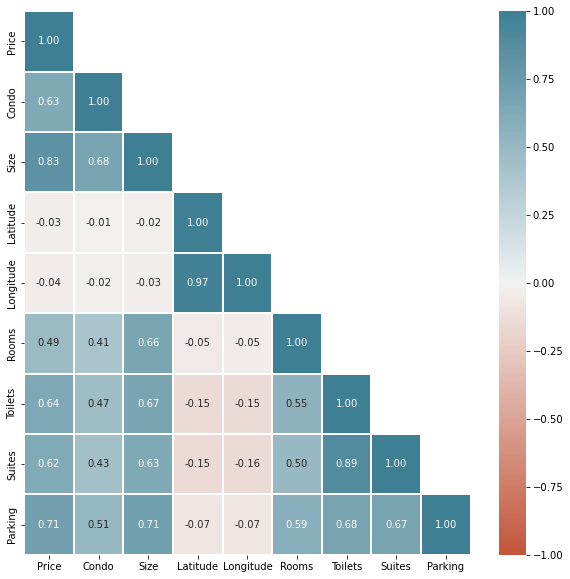

In [32]:
plt.figure(figsize=(10, 10))

mask = np.zeros_like(df_sale[num_atri].corr())
mask[np.triu_indices_from(mask, k=1)] = True

sns.heatmap(df_sale[num_atri].corr(), mask=mask, linewidths=.3, cmap=sns.diverging_palette(20, 220, as_cmap=True), vmin=-1, vmax=1, annot = True, fmt = '.2f')

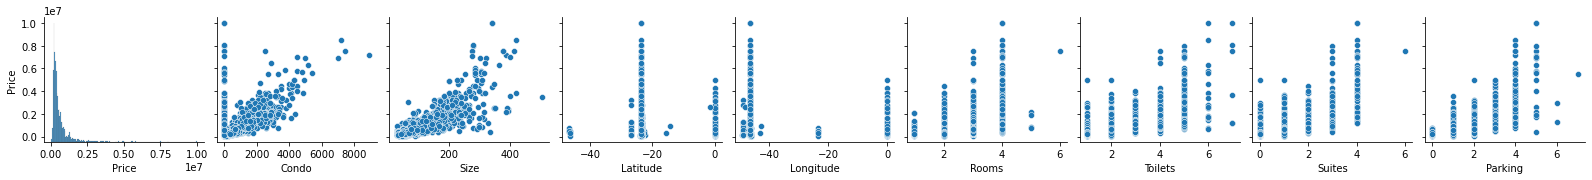

In [33]:
sns.pairplot(df_sale,y_vars=["Price"], x_vars = num_atri)

Os apartamentos para alugar possuem uma alta correlação com as características internas do imóvel (Tamanho, quartos, banheiros, suites, estacionamentos). O valor do condomínio também possui uma correlação positiva com o preço do imóvel.

In [34]:
df_sale.groupby('Elevator')['Price'].describe().T.round(2)

Elevator,0,1
count,2949.00,2092.00
mean,571978.15,662766.77
std,715544.00,771993.91
min,45000.00,68000.00
25%,239000.00,279742.50
50%,358000.00,430000.00
75%,635000.00,730000.00
max,10000000.00,9979947.00


In [35]:
df_sale.groupby('Furnished')['Price'].describe().T.round(2)

Furnished,0,1
count,4451.00,590.00
mean,592338.33,740294.43
std,734308.76,776096.82
min,47481.00,45000.00
25%,240500.00,330000.00
50%,370000.00,500000.00
75%,650000.00,850000.00
max,10000000.00,8039200.00


In [36]:
df_sale.groupby('Swimming_Pool')['Price'].describe().T.round(2)

Swimming_Pool,0,1
count,2297.0,2744.00
mean,467906.4,728312.91
std,547184.8,852484.55
min,45000.0,68000.00
25%,210000.0,320000.00
50%,285000.0,470000.00
75%,500000.0,760000.00
max,10000000.0,9979947.00


In [37]:
df_sale.groupby('New')['Price'].describe().T.round(2)

New,0,1
count,4888.00,153.00
mean,614725.57,447667.01
std,747559.24,447513.23
min,45000.00,139900.00
25%,250000.00,199000.00
50%,385000.00,265999.00
75%,680000.00,567600.00
max,10000000.00,3050003.00


In [38]:
df_sale.groupby('District')['Price'].describe()[['count','mean']].round(2).sort_values(by='mean', ascending = False)

,count,mean
District,,
Iguatemi/São Paulo,15.0,3770329.80
Alto de Pinheiros/São Paulo,79.0,2448632.65
Jardim Paulista/São Paulo,68.0,1855117.65
Itaim Bibi/São Paulo,52.0,1812209.63
Vila Olimpia/São Paulo,31.0,1699720.94
...,...,...
São Rafael/São Paulo,28.0,198250.00
Guaianazes/São Paulo,62.0,195338.42
Artur Alvim/São Paulo,70.0,190741.39


Em relação as variáveis categóricas, temos que apartamentos mobiliados, com piscina e elevador possuem um preço mais caro.  Sobre a condição do apartamento, temos poucas amostras de *apartamentos novos para comprar*, de modo que não é possível fazer essa comparação.

É possível encontrar uma grande diferença no preço de venda dos apartamentos em relação aos bairros, lugares consideramos mais "nobres" como Iguatemi e Alto de Prinheiros possuem um valor médio de venda mais alto em relação a Cidade Tiradentes e Lajeado

### 2.6. Conclusão

O preço do imóvel possui uma alta correlação com as características do imóvel e conforme o aumento da quantidade de cômodos e atributos (estacionamento, piscina, mobilia) o preço tende a aumentar. A base de dados possui um atributo fundamental para definir o preço final, se o imóvel está para vender ou alugar. Um atributo bem importante é o bairro onde o imóvel está localizado, possuindo um preço médio diferente dependendo do local. É possível que a divisão da base tenha ocultado algum bairro e quando submetidos a dados não vistos venha ocorrer alguma inconsistência. Vamos tratar essa possibilidade mais a diante

Algumas colunas possuem uma relação menos com os dados. A latitude e longitude são numericamente pouco significante, podendo utilzar a informação do bairro em relação a localização. A coluna Property_Type não oferece nenhuma informação adiconal pois possui um valor único. Por fim, pouco se consegue extrair da informação sobre o imóvel ser novo ou não pois a quantidade de imóveis novos são bem inferiores quando comparadas com usados.

## 3. Preparação das Bases

In [39]:
df_prep = df_train.copy()

### 3.1. Exclusão de colunas e divisão da base de dados

Vamos remover algumas colunas que não favorecem a criação do modelo. São elas 
* Latitude
* Longitude
* Property_Type

In [40]:
df_prep = df_prep.drop(columns = ['Property_Type','Latitude','Longitude'])
df_prep.head(3)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming_Pool,New,District,Negotiation_Type
7220,225000,270,50,2,2,1,1,0,1,1,0,Jardim Ângela/São Paulo,sale
9132,1500,370,50,2,2,1,1,1,0,0,0,Brás/São Paulo,rent
5206,1800,540,50,2,2,1,1,0,0,1,0,Mooca/São Paulo,rent


### 3.2. Transformação de variáveis

Temos duas variáveis que estão em formato de texto 
* District
* Negotiation_Type

Vamos transformar esses valores em númericos para facilitar a criação do modelo

#### 3.2.2. Negotiation_Type

* Sale → 1
* Rent → 0

In [41]:
Negotiation = {'sale':1,'rent':0}
df_prep['Negotiation_Type'] = df_prep['Negotiation_Type'].map(Negotiation)
df_prep.head(3)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming_Pool,New,District,Negotiation_Type
7220,225000,270,50,2,2,1,1,0,1,1,0,Jardim Ângela/São Paulo,1
9132,1500,370,50,2,2,1,1,1,0,0,0,Brás/São Paulo,0
5206,1800,540,50,2,2,1,1,0,0,1,0,Mooca/São Paulo,0


#### 3.2.2. District

A variável *district* é uma variável categórica, vamos transformar ela em colunas binárias 
A Variável District é um pouco mais complexo de transformar em numérica pois a idéia de "ordem" pode acabar confundindo o modelo. A principio vamos ordenar os bairros da menor para a maior média de Preço. Para isso usaremos os valores do preço dos imóveis disponíveis para venda



In [42]:
district = pd.DataFrame(df_prep.groupby('District')[['Price']].mean()).sort_values(by=['Price'])
district['index'] = np.arange(district.shape[0])
district

,Price,index
District,,
Cidade Tiradentes/São Paulo,7.108696e+04,0
Pirituba/São Paulo,7.630083e+04,1
Butantã/São Paulo,8.207736e+04,2
Freguesia do Ó/São Paulo,8.347412e+04,3
Brasilândia/São Paulo,1.010559e+05,4
...,...,...
Moema/São Paulo,7.087001e+05,91
Brooklin/São Paulo,7.371282e+05,92
Vila Olimpia/São Paulo,8.263476e+05,93


In [43]:
#df_train['District'] = df_train['District'].map(district['index'])
# one hot encoding by pandas
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
df_prep_OHE = encoder.fit_transform(df_prep[['District']])

In [44]:
df_prep_OHE

<10656x96 sparse matrix of type '<class 'numpy.float64'>'
	with 10656 stored elements in Compressed Sparse Row format>

In [45]:
encoder.categories_

[array(['Alto de Pinheiros/São Paulo', 'Anhanguera/São Paulo',
        'Aricanduva/São Paulo', 'Artur Alvim/São Paulo',
        'Barra Funda/São Paulo', 'Bela Vista/São Paulo', 'Belém/São Paulo',
        'Bom Retiro/São Paulo', 'Brasilândia/São Paulo',
        'Brooklin/São Paulo', 'Brás/São Paulo', 'Butantã/São Paulo',
        'Cachoeirinha/São Paulo', 'Cambuci/São Paulo',
        'Campo Belo/São Paulo', 'Campo Grande/São Paulo',
        'Campo Limpo/São Paulo', 'Cangaíba/São Paulo',
        'Capão Redondo/São Paulo', 'Carrão/São Paulo',
        'Casa Verde/São Paulo', 'Cidade Ademar/São Paulo',
        'Cidade Dutra/São Paulo', 'Cidade Líder/São Paulo',
        'Cidade Tiradentes/São Paulo', 'Consolação/São Paulo',
        'Cursino/São Paulo', 'Ermelino Matarazzo/São Paulo',
        'Freguesia do Ó/São Paulo', 'Grajaú/São Paulo',
        'Guaianazes/São Paulo', 'Iguatemi/São Paulo', 'Ipiranga/São Paulo',
        'Itaim Bibi/São Paulo', 'Itaim Paulista/São Paulo',
        'Itaquera/Sã

### 3.2. Feature Scaling

As variáveis númericas possuem dimensões muito diferentes. Desse modo é interessante fazer uma transformação para que as unidades não possuam um intervalo de dados muito distinto. Como vimos na análise exploratória, os atributos **Condo** e **Size** possuem vários outliers. Dessa forma optamos por utilizar o *Z-Score Normalization* para transformar as variáveis.

In [46]:
from sklearn.preprocessing import StandardScaler

num_atri = ['Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking']

scaler = StandardScaler()

df_prep[num_atri] = scaler.fit_transform(df_prep[num_atri])
df_prep[num_atri]

,Condo,Size,Rooms,Toilets,Suites,Parking
7220,-0.557105,-0.590213,-0.409082,-0.085565,0.014250,-0.478990
9132,-0.426868,-0.590213,-0.409082,-0.085565,0.014250,-0.478990
5206,-0.205465,-0.590213,-0.409082,-0.085565,0.014250,-0.478990
135,-0.908745,-0.250407,-0.409082,-0.085565,0.014250,-0.478990
4833,0.198269,-0.199436,-0.409082,-0.085565,0.014250,-0.478990
...,...,...,...,...,...,...
4716,0.237340,-0.420310,-0.409082,-1.126415,-1.181436,-0.478990
4774,-0.196349,-0.352349,-0.409082,-1.126415,-1.181436,-1.673214
3379,1.565757,2.332124,-0.409082,0.955285,1.209937,3.103684
960,-0.452915,-0.624194,-0.409082,-0.085565,0.014250,-0.478990


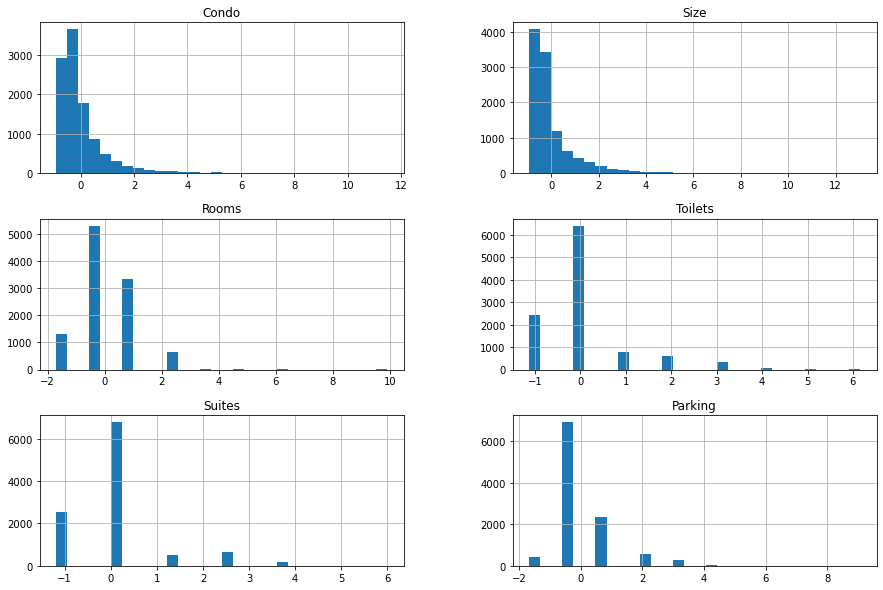

In [47]:
df_prep[num_atri].hist(bins=30, figsize=(15,10))
display()

### 3.3. Pipeline de pré-processamento

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [49]:
drop_attributes = ['Property_Type', 'Latitude', 'Longitude']
numerical_attributes = ['Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking']
categorical_attributes = ['Elevator', 'Furnished', 'Swimming_Pool', 'New', 'District']

prep_pipeline = ColumnTransformer([
    ('drop_features', 'drop', drop_attributes),
    ('scale_numerical', StandardScaler(), numerical_attributes),
    ('encode_categorical', OneHotEncoder(handle_unknown='ignore'), categorical_attributes)
], remainder='drop')

## 4. Modelos de Aprendizado de Máquina

In [50]:
import numpy as np

def grid_search_rmse(gridsearchcv, folds):
    split_keys = [f'split{i}_test_score' for i in range(folds)]
    best_index = gridsearchcv.best_index_

    rmse_scores = []
    
    for key in split_keys:
        neg_mse_score = gridsearchcv.cv_results_[key][best_index]
        rmse_scores.append(np.sqrt(-neg_mse_score))

    best_rmse = np.mean(rmse_scores)
    best_rmse_std = np.std(rmse_scores)

    return best_rmse, best_rmse_std

### 4.1. Separação dos atributos (variávies independentes) e rótulo (variável dependente)

In [51]:
df_sale = df_train[df_train.Negotiation_Type == 'sale'].copy()
df_rent = df_train[df_train.Negotiation_Type == 'rent'].copy()

In [52]:
df_sale_features = df_sale.drop(columns=['Price'])
df_sale_target = df_sale['Price'].values

df_rent_features = df_rent.drop(columns=['Price'])
df_rent_target = df_rent['Price'].values

negotiations = [
    ('Sale', df_sale_features, df_sale_target),
    ('Rent', df_rent_features, df_rent_target)
]

### 4.2. Treinamento dos modelos

In [53]:
from sklearn.model_selection import GridSearchCV

num_folds = 5

#### 4.2.1. Regressão Linear

In [54]:
from sklearn.linear_model import LinearRegression

linreg_pipeline = Pipeline([
    ('preprocessing', prep_pipeline),
    ('linear_regression', LinearRegression())
])

linreg_param_grid = {
    'preprocessing__encode_categorical__drop': ['if_binary', 'first', None],
    'linear_regression__fit_intercept': [True, False],
}

for (name, features, target) in negotiations:
    linreg_gridsearch = GridSearchCV(linreg_pipeline, linreg_param_grid, cv=num_folds, scoring='neg_mean_squared_error', return_train_score=True)
    linreg_gridsearch.fit(features, target)
    best_rmse, best_rmse_std = grid_search_rmse(linreg_gridsearch, num_folds)

    print(f"Negotiation type: {name}")
    print(f"Melhor conjunto de parâmetros: {linreg_gridsearch.best_params_}")
    print(f"Melhor RMSE: {best_rmse:.2f} ± {best_rmse_std:.2f}")

Negotiation type: Sale
Melhor conjunto de parâmetros: {'linear_regression__fit_intercept': False, 'preprocessing__encode_categorical__drop': 'if_binary'}
Melhor RMSE: 323720.45 ± 20560.84


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Negotiation type: Rent
Melhor conjunto de parâmetros: {'linear_regression__fit_intercept': False, 'preprocessing__encode_categorical__drop': None}
Melhor RMSE: 2029.37 ± 198.21


#### 4.2.2. Árvore de Decisão

In [55]:
from sklearn.tree import DecisionTreeRegressor

dectree_pipeline = Pipeline([
    ('preprocessing', prep_pipeline),
    ('decision_tree', DecisionTreeRegressor())
])

dectree_param_grid = {
    'preprocessing__encode_categorical__drop': ['if_binary'],
    # 'decision_tree__splitter': ['best', 'random'],
    'decision_tree__max_depth': [None, 10],
    'decision_tree__max_features': ['auto', 'sqrt', 'log2'], 
    # 'decision_tree__max_leaf_nodes': [None, 2, 4, 10],
    # 'decision_tree__min_impurity_decrease': [0.0, 1.0, 2.0, 10.0],
    # 'decision_tree__min_samples_leaf': [1, 2, 5, 10],
    # 'decision_tree__min_samples_split': [2, 4, 8, 12],
    # 'decision_tree__min_weight_fraction_leaf': [0.0, 1.0, 3.0, 8.0]
}

for (name, features, target) in negotiations:
    dectree_gridsearch = GridSearchCV(dectree_pipeline, dectree_param_grid, cv=num_folds, scoring='neg_mean_squared_error', return_train_score=True)
    dectree_gridsearch.fit(features, target)
    best_rmse, best_rmse_std = grid_search_rmse(dectree_gridsearch, num_folds)

    print(f"Negotiation type: {name}")
    print(f"Melhor conjunto de parâmetros: {dectree_gridsearch.best_params_}")
    print(f"Melhor RMSE: {best_rmse:.2f} ± {best_rmse_std:.2f}")

Negotiation type: Sale
Melhor conjunto de parâmetros: {'decision_tree__max_depth': 10, 'decision_tree__max_features': 'auto', 'preprocessing__encode_categorical__drop': 'if_binary'}
Melhor RMSE: 320841.00 ± 36202.33


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories

Negotiation type: Rent
Melhor conjunto de parâmetros: {'decision_tree__max_depth': None, 'decision_tree__max_features': 'sqrt', 'preprocessing__encode_categorical__drop': 'if_binary'}
Melhor RMSE: 2435.50 ± 436.78


#### 4.2.3. Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

randforest_pipeline = Pipeline([
    ('preprocessing', prep_pipeline),
    ('random_forest', RandomForestClassifier())
])

randforest_param_grid = {
    'preprocessing__encode_categorical__drop': ['if_binary'],
    'random_forest__n_estimators': [10]
}

for (name, features, target) in negotiations:
    randforest_gridsearch = GridSearchCV(randforest_pipeline, randforest_param_grid, cv=num_folds, scoring='neg_mean_squared_error', return_train_score=True, verbose=3)
    randforest_gridsearch.fit(features, target)
    best_rmse, best_rmse_std = grid_search_rmse(randforest_gridsearch, num_folds)

    print(f"Negotiation type: {name}")
    print(f"Melhor conjunto de parâmetros: {randforest_gridsearch.best_params_}")
    print(f"Melhor RMSE: {best_rmse:.2f} ± {best_rmse_std:.2f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END preprocessing__encode_categorical__drop=if_binary, random_forest__n_estimators=10;, score=(train=-982905338.811, test=-207133283125.897) total time=  10.4s
[CV 2/5] END preprocessing__encode_categorical__drop=if_binary, random_forest__n_estimators=10;, score=(train=-1248811587.953, test=-136856716967.421) total time=  10.1s
[CV 3/5] END preprocessing__encode_categorical__drop=if_binary, random_forest__n_estimators=10;, score=(train=-6112038044.615, test=-106570958783.621) total time=  10.3s
[CV 4/5] END preprocessing__encode_categorical__drop=if_binary, random_forest__n_estimators=10;, score=(train=-7658458090.391, test=-173117419706.709) total time=  10.6s
[CV 5/5] END preprocessing__encode_categorical__drop=if_binary, random_forest__n_estimators=10;, score=(train=-1039099006.055, test=-198325657126.632) total time=   9.9s
Negotiation type: Sale
Melhor conjunto de parâmetros: {'preprocessing__encode_categorical__drop': 'if_binary', 'random_forest__n_estimators': 10}
Melho

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END preprocessing__encode_categorical__drop=if_binary, random_forest__n_estimators=10;, score=(train=-43865.123, test=-5804466.720) total time=   4.8s


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 2/5] END preprocessing__encode_categorical__drop=if_binary, random_forest__n_estimators=10;, score=(train=-22337.487, test=-6349594.873) total time=   4.8s
[CV 3/5] END preprocessing__encode_categorical__drop=if_binary, random_forest__n_estimators=10;, score=(train=-27603.072, test=-8515741.979) total time=   5.0s
[CV 4/5] END preprocessing__encode_categorical__drop=if_binary, random_forest__n_estimators=10;, score=(train=-57089.422, test=-6636092.972) total time=   4.7s
[CV 5/5] END preprocessing__encode_categorical__drop=if_binary, random_forest__n_estimators=10;, score=(train=-462841.803, test=-4962447.637) total time=   4.8s
Negotiation type: Rent
Melhor conjunto de parâmetros: {'preprocessing__encode_categorical__drop': 'if_binary', 'random_forest__n_estimators': 10}
Melhor RMSE: 2530.20 ± 227.55


### 4.3. Avaliação dos modelos

### 4.3. Discussão dos resultatos
* Métricas utilizadas
* Há overfitting ou underfitting?

### 4.5. Próximos passos
* Estratégias, ideias, sugestões para melhorar o modelo

## Atividades opcionais

### a) Usar pipelines (scikit-Learn)

### b) Fine-tuning

### c) Ensemble methods

### d) Abordagem de negócio
* Motivação e descrição do problema 
* Baseline
* Comparação dos resultados com o baseline
* Conversão dos resultados em medidas de performace para o negócio